# Cross Validation

It is a type of resampling method.It can be used with any kind of model be it ML model or DL model. When dataset available is not huge, then cv can be used for giving better or more reliable estimates for the model.

* Understand importance of cross validation
* How to perform cross validation using sklearn library
* Understand various parameters involved in cross validation

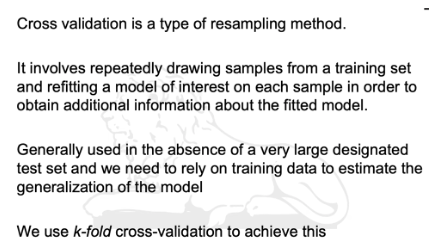

## Method of Cross Validation

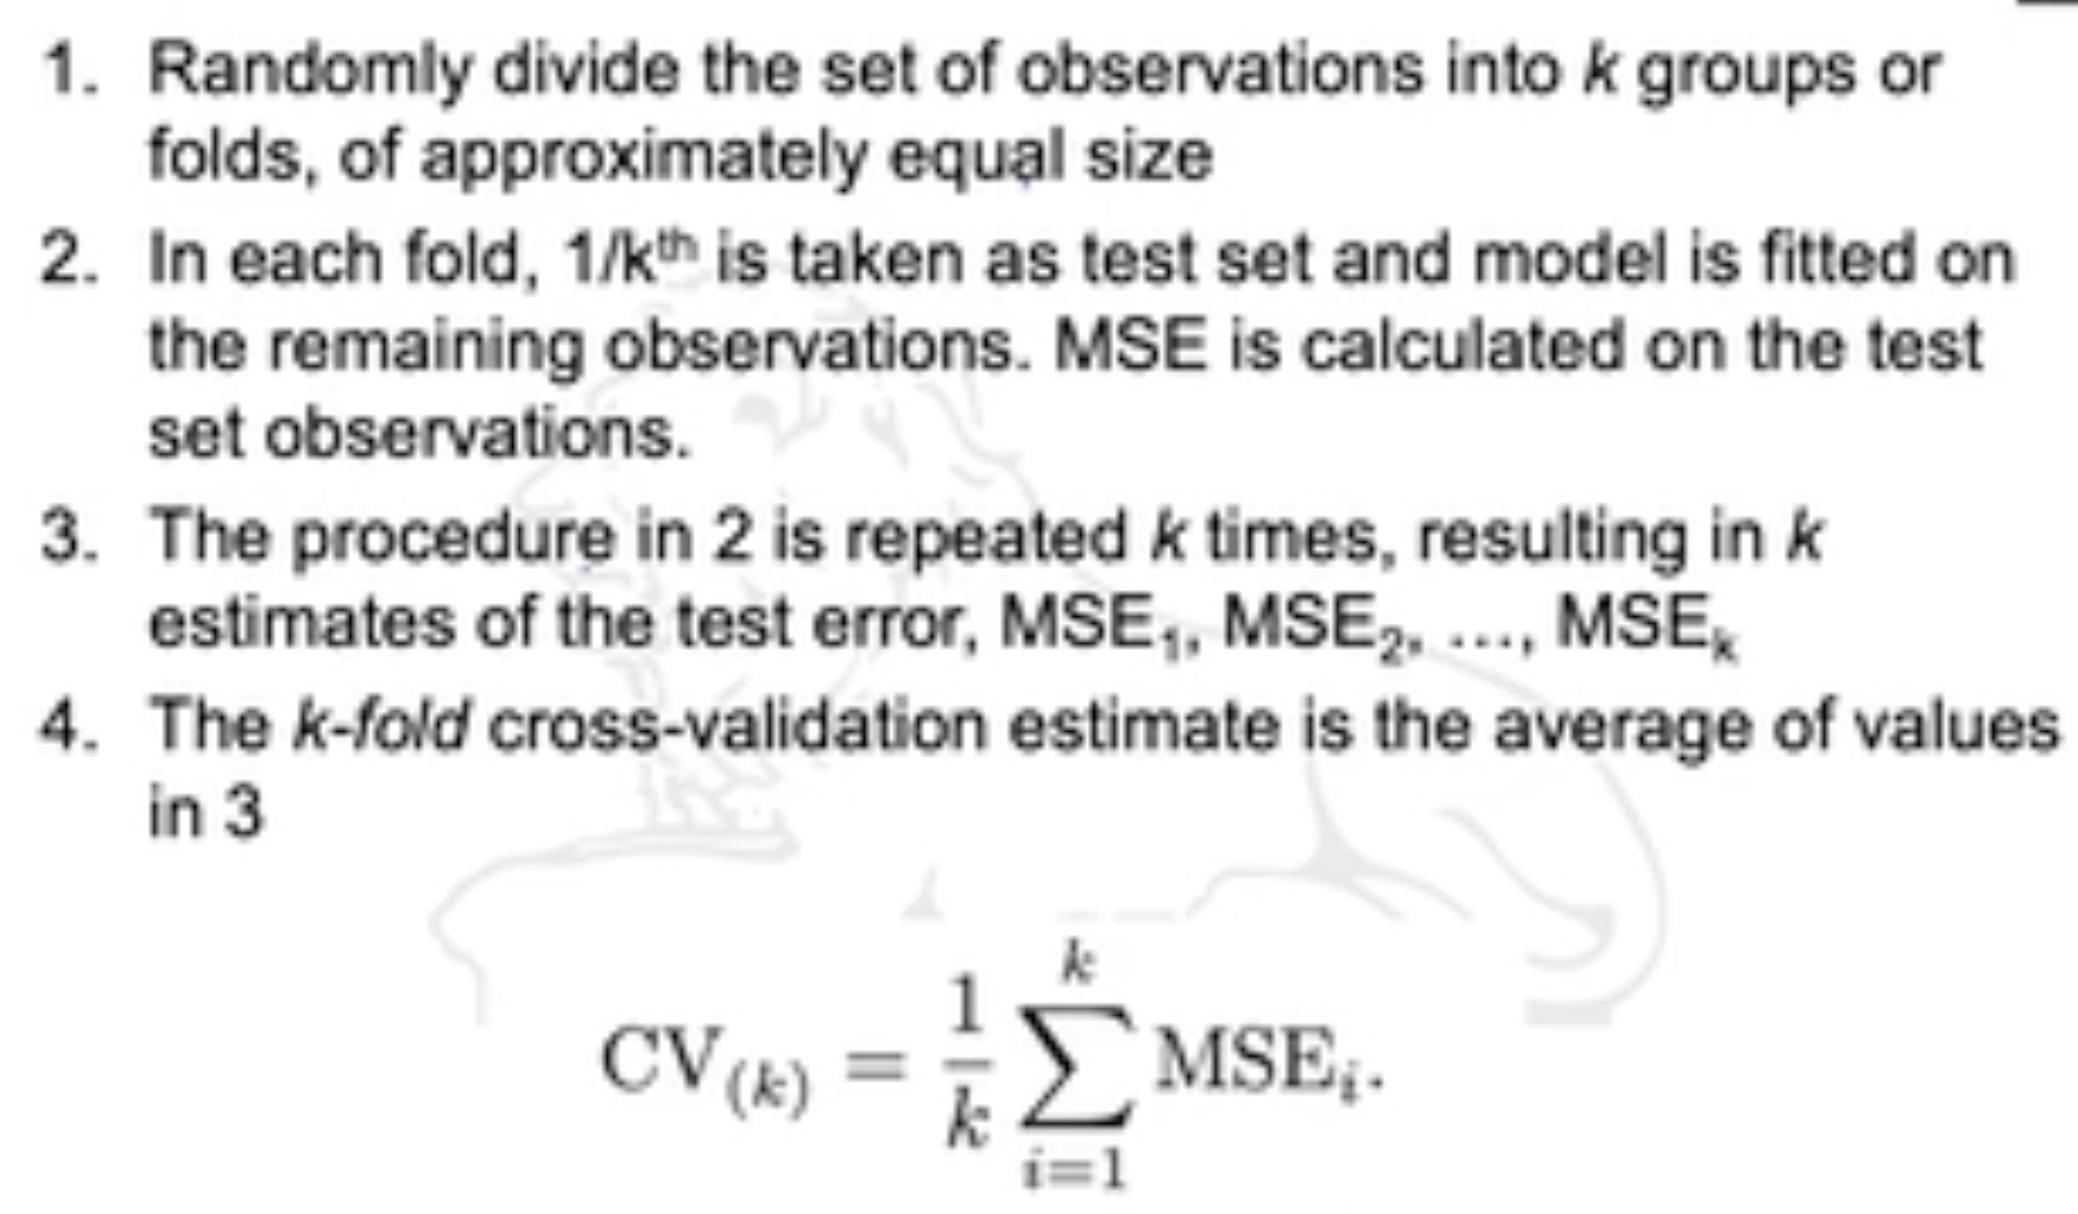

There will be overlap of training data in different k folds but never overlap of test data in any of k folds.

*<font color=blue>Whatever average mse u get, u report that mse as the result for your model.*

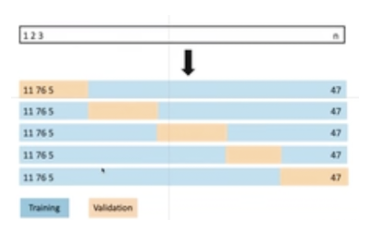

Initially data is like 1,2,3 ... n so to avoid any biases you first shuffle the training data and then you apply k-fold.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv('datasets/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
ohe = pd.get_dummies(data, drop_first=True)
y = 'expenses'
x = ohe.columns.drop(y)
ohe.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


With different random states you get different ans because data split is a bit different every time.

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(ohe[x], ohe[y], test_size=.2, random_state=1)

In [5]:
dr = DecisionTreeRegressor(max_depth=5).fit(xtrain, ytrain)
ypred_test = dr.predict(xtest)

print('RMSE: %.2f' % np.sqrt(mean_squared_error(ytest, ypred_test)))
print('R2 Score : %.2f' % r2_score(ytest, ypred_test))

RMSE: 4597.23
R2 Score : 0.86


In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(ohe[x], ohe[y], test_size=.2, random_state=3)

In [7]:
dr = DecisionTreeRegressor(max_depth=5).fit(xtrain, ytrain)
ypred_test = dr.predict(xtest)

print('RMSE: %.2f' % np.sqrt(mean_squared_error(ytest, ypred_test)))
print('R2 Score : %.2f' % r2_score(ytest, ypred_test))

RMSE: 4482.24
R2 Score : 0.87


# Cross validation - calc score

In [8]:
dr = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(dr, xtrain, ytrain, cv=5)
scores

array([0.88010884, 0.83871452, 0.82149267, 0.84931762, 0.81968273])

* Above score is R2_score

In [9]:
avg_score = scores.mean()
sqr_std = scores.std()*2

print('Expected R Square: %.2f (+/- %.2f)' %(avg_score, sqr_std))
print('Range for R Square: %.2f - %.2f' %(avg_score - sqr_std, avg_score + sqr_std))

Expected R Square: 0.84 (+/- 0.04)
Range for R Square: 0.80 - 0.89


In [10]:
cv_results = cross_validate(dr, xtrain, ytrain, cv=5)
cv_results # returns time it took to calc the scores

{'fit_time': array([0.00556087, 0.00379491, 0.00367808, 0.00302887, 0.00312614]),
 'score_time': array([0.00269699, 0.00226593, 0.00138211, 0.00157809, 0.00130987]),
 'test_score': array([0.88010884, 0.83871452, 0.82149267, 0.84931762, 0.81968273])}

# Display train scores also

In [11]:
cv_results = cross_validate(dr, xtrain, ytrain, cv=5, return_train_score=True)
cv_results # returns time it took to calc the scores

{'fit_time': array([0.00532317, 0.00436592, 0.00265694, 0.00283504, 0.00293708]),
 'score_time': array([0.00314522, 0.00190115, 0.00120306, 0.00126004, 0.001544  ]),
 'test_score': array([0.88010884, 0.83871452, 0.82149267, 0.84931762, 0.81968273]),
 'train_score': array([0.8757661 , 0.88592518, 0.8897761 , 0.8822467 , 0.88548673])}